
**Модуль 11. Рекурентні нейронні мережі**

---
Cтворити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

Використати рекурентну нейронну мережу.
Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.



In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, Dense
from keras.callbacks import EarlyStopping

In [2]:
max_features = 10000
maxlen = 500
layer=32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
print("Review:")
print(input_train[1])
print("Label:")
print(y_train[1])

Review:
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
Label:
0


In [4]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [ ]:
display(y_train.shape)
display(input_train.shape)

(25000,)

(25000, 500)

In [ ]:
# print padded sequence:

print(input_train[1000])
print(len(input_train[1000]))


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

**Функція відображення графіків втрат і точності на наборах даних**

In [5]:
def plot_history(history):
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'r', label='Втрати на тренувальному наборі')
    plt.plot(epochs, val_loss, 'b', label='Втрати на тестовому наборі')
    plt.plot(epochs, train_acc, 'g', label='Точність на тренувальному наборі')
    plt.plot(epochs, val_acc, 'y', label='Точність на тестовому наборі')

    plt.title('Втрати та точність на тренувальному та тестовому наборі')
    plt.xlabel('Епоха')
    plt.ylabel('Метрики')
    plt.legend()
    plt.show()

In [6]:
def train_model(input_train, y_train, input_test, y_test,
                rnn_func,
                max_features=max_features,
                layer=layer,
                epochs=20,
                batch_size=32,
                dropout_rate=0.1,
                loss_function='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
                ):

    model = rnn_func(max_features=max_features, layer=layer)

    model.compile(optimizer=optimizer,
                  loss=loss_function,
                  metrics=metrics)

    model.summary()
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    history = model.fit(input_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(input_test, y_test),
                        callbacks=[early_stopping])

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Точність на тестових даних:', test_acc)

    train_loss, train_acc = model.evaluate(input_train, y_train)
    print('Точність на тренувальних даних:', train_acc)

    return model, history, (test_loss, test_acc), (train_loss, train_acc)



**Звичайна RNN**

---



In [ ]:
def recurent_nn_simple(max_features=max_features, layer=layer):
    model = Sequential()
    model.add(Embedding(max_features, layer))
    model.add(SimpleRNN(layer))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
rnn_test_1 = train_model(input_train, y_train, input_test, y_test,
                recurent_nn_simple,
                max_features=max_features,
                layer=layer,
                epochs=6,
                batch_size=32,
                dropout_rate=0.1,
                loss_function='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
                )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
782/782 [==============================] - 461s 586ms/step - loss: 0.5854 - accuracy: 0.6799 - val_loss: 0.4884 - val_accuracy: 0.7666
Epoch 2/6
782/782 [==============================] - 409s 524ms/step - loss: 0.3275 - accuracy: 0.8645 - val_loss: 0.3679 - val_accuracy: 0

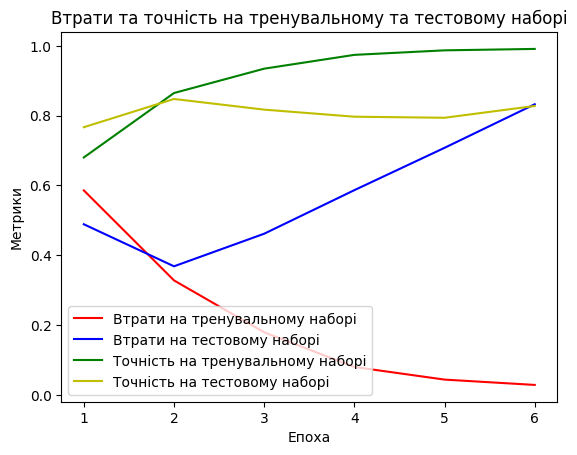

In [ ]:
plot_history(rnn_test_1[1])

**LSTM**

---



In [ ]:
def lstm_rnn(max_features=max_features, layer=layer):
    model = Sequential()
    # Створення порожньої моделі Sequential

    # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    model.add(Embedding(max_features, layer))
    # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

    # Додавання LSTM шару з числом layer вузлів
    model.add(LSTM(layer))
    # Параметр: кількість вузлів (розмір прихованого стану)

    # Додавання Dense шару з одним вузлом та активацією sigmoid
    model.add(Dense(1, activation='sigmoid'))
    # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    return model

In [ ]:
lstm_test_1 = train_model(input_train, y_train, input_test, y_test,
                lstm_rnn,
                max_features=max_features,
                layer=layer,
                epochs=6,
                batch_size=32,
                dropout_rate=0.1,
                loss_function='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
                )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
782/782 [==============================] - 70s 87ms/step - loss: 0.4327 - accuracy: 0.7951 - val_loss: 0.3448 - val_accuracy: 0.8581
Epoch 2/6
782/782 [==============================] - 32s 41ms/step - loss: 0.2790 - accuracy: 0.8885 - val_loss: 0.3190 - val_accuracy: 0.8

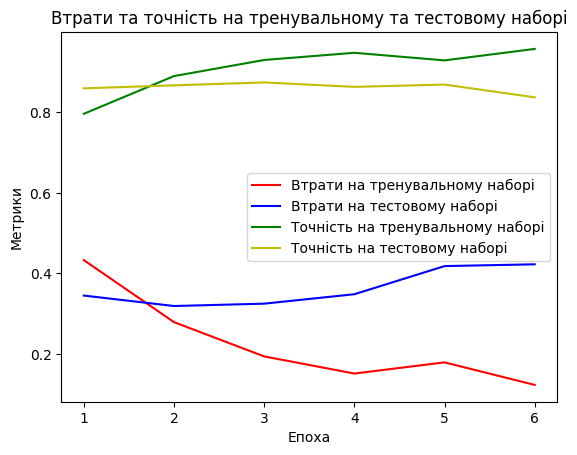

In [ ]:
plot_history(lstm_test_1[1])

**BRNN**

---



In [ ]:
def bdirect_rnn(max_features=max_features, layer=layer):

    model = Sequential()
    # Створення порожньої моделі Sequential

    # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    model.add(Embedding(max_features, layer))
    # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

    # Додавання Bidirectional LSTM шару з 32 вузлами
    model.add(Bidirectional(LSTM(layer)))
    # Параметр: кількість вузлів (розмір прихованого стану)

    # Додавання Dense шару з одним вузлом та активацією sigmoid
    model.add(Dense(1, activation='sigmoid'))
    # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    return model


In [ ]:
bdirect_test_1 = train_model(input_train, y_train, input_test, y_test,
                bdirect_rnn,
                max_features=max_features,
                layer=layer,
                epochs=6,
                batch_size=32,
                dropout_rate=0.1,
                loss_function='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
                )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
782/782 [==============================] - 80s 97ms/step - loss: 0.4461 - accuracy: 0.7875 - val_loss: 0.3465 - val_accuracy: 0.8633
Epoch 2/6
782/782 [==============================] - 47s 60ms/step - loss

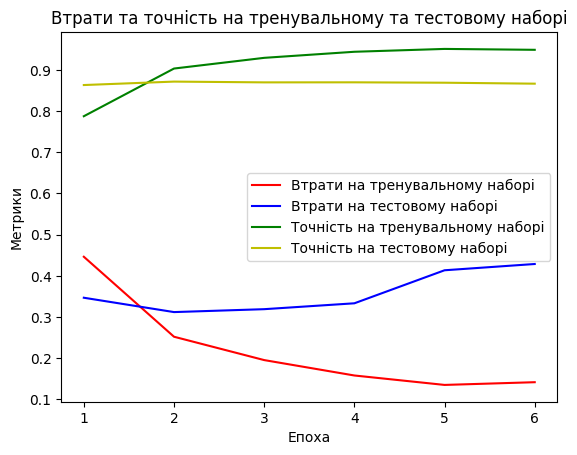

In [ ]:
plot_history(bdirect_test_1[1])

**Deep BRNN**

---



In [7]:
def deep_bdirect_rnn(max_features=max_features, layer=layer):

    model = Sequential()
    # Створення порожньої моделі Sequential

    # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    model.add(Embedding(max_features, layer))
    # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

    # Додавання декількох Bidirectional LSTM шару з 32 вузлами
    model.add(Bidirectional(LSTM(layer, return_sequences=True)))
    model.add(Bidirectional(LSTM(layer)))
    # Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

    # Додавання Dense шару з одним вузлом та активацією sigmoid
    model.add(Dense(1, activation='sigmoid'))
    # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    return model

In [8]:
deep_bdirect_test_1 = train_model(input_train, y_train, input_test, y_test,
                deep_bdirect_rnn,
                max_features=max_features,
                layer=layer,
                epochs=6,
                batch_size=32,
                dropout_rate=0.1,
                loss_function='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
                )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, None, 64)          16640     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
782/782 [=

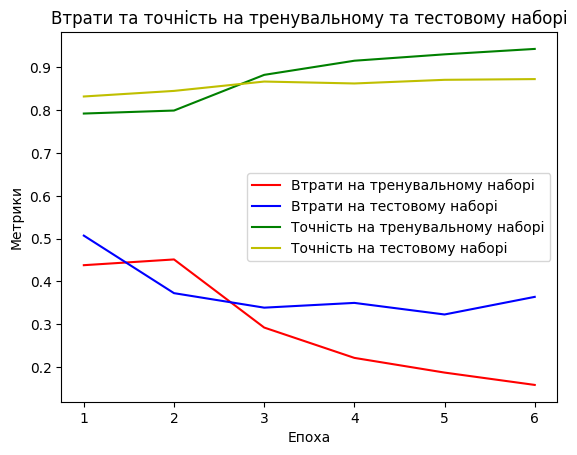

In [9]:
plot_history(deep_bdirect_test_1[1])

**Функція пошуку оптимальних параметрів**

In [ ]:
def find_optimal_parameters(n_ntwork_train_model_func, input_train, y_train, input_test, y_test, parameters, optimal_parameters, study_sequence):
    best_accuracy = 0.0
    best_parameters = {}

    for param in study_sequence:
        print('>>>-------------------------START---------------------------->>>')
        print(f"Searching for optimal value for parameter: {param}")
        param_values = parameters[param]
        best_value = optimal_parameters[param]
        for value in param_values:
            optimal_parameters[param] = value
            print(f"Testing value: {value}")
            model, history, (test_loss, test_acc), (train_loss, train_acc) = n_ntwork_train_model_func(input_train, y_train, input_test, y_test, **optimal_parameters)
            if test_acc > best_accuracy:
                best_accuracy = test_acc
                best_parameters = copy.deepcopy(optimal_parameters)
                best_value = value
            # Результати навчання для параметра
            print(f"Досліджений параметр {param} = {value}")

            plot_history(history)
            print('Parameters', optimal_parameters)
            print('test_loss =', test_loss)
            print('test_acc =', test_acc)
            print('train_loss =', train_loss)
            print('train_acc =', train_acc)

        print('<<<-------------------------END----------------------------<<<')
        # Update optimal parameter for the current parameter
        optimal_parameters[param] = best_value
        print(f"Optimal value for parameter {param}: {best_value}, test accuracy: {best_accuracy}")
        print()

    print("Optimal parameters:")
    print(best_parameters)
    print(f"Test accuracy: {best_accuracy}")
    return best_parameters, best_accuracy



---

**Simple RNN**

- **42**ms/step
- Точність на тестових даних: **0.82**
- Точність на тренувальних даних: **0.95**
- loss: **0.13**


```
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 embedding_1 (Embedding)     (None, None, 32)          320000    
 lstm (LSTM)                 (None, 32)                8320      
 dense_1 (Dense)             (None, 1)                 33        
=================================================================
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
```
---

**LSTM**
- **9**ms/step
- Точність на тестових даних: **0.83**
- Точність на тренувальних даних: **0.93**
- loss: **0.1728**

```
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 embedding_1 (Embedding)     (None, None, 32)          320000    
 lstm (LSTM)                 (None, 32)                8320      
 dense_1 (Dense)             (None, 1)                 33        
=================================================================
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
```
---


**BRNN**
- **15**ms/step
- Точність на тестових даних: **0.86**
- Точність на тренувальних даних: **0.98**
- loss: **0.08**


```
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 embedding_2 (Embedding)     (None, None, 32)          320000    
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
 dense_2 (Dense)             (None, 1)                 65        
=================================================================
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

---


**Depp BRNN**
- **27**ms/step
- Точність на тестових даних: **0.87**
- Точність на тренувальних даних: **0.96**
- loss: **0.12**



```
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 embedding (Embedding)       (None, None, 32)          320000    
 bidirectional (Bidirection  (None, None, 64)          16640     
 al)                                                             
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
 dense (Dense)               (None, 1)                 65        
=================================================================
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Точність на тестових даних: 0.8722000122070312
782/782 [==============================] - 27s 35ms/step - loss: 0.1155 - accuracy: 0.9624
Точність на тренувальних даних: 0.9624000191688538

```



---




| Модель       | Час/крок (ms) | Точність на тесті | Точність на тренуванні | Втрата (loss) |
|--------------|---------------|---------------------|------------------------|---------------|
| Simple RNN   | 42            | 0.82                | 0.95                   | 0.13          |
| LSTM         | 9             | 0.83                | 0.93                   | 0.1728        |
| BRNN         | 15            | 0.86                | 0.98                   | 0.08          |
| Deep BRNN    | 27            | 0.87                | 0.96                   | 0.12          |



  **Висновки**
  1.  **Висока точність на тренувальних даних**: У всіх варіантах моделей нами спостерігається висока точність на тренувальних даних. Це означає, що моделі ефективно навчаються і здатні добре адаптуватися до навчальних даних.

  2. **Відмінна точність на тестових даних**: На тестових даних модель **Deep BRNN** показує найвищу точність порівняно з іншими варіантами моделей. Це означає, що вона краще узагальнює знання на нових, раніше не бачених даних.

  3. **Час навчання**: Час навчання суттєво відрізняється між SimpleRNN і LSTM та BRNN. За аналогічної або меншої кількості параметрів мережа SimpleRNN має тенденцію до проблеми з втратою градієнту від далеких часових кроків. Схоже, що це призводить до того, що SimpleRNN потребує більше часу для збіжності, оскільки вона може потребувати більше ітерацій для навчання. Deep BRNN модель навчалася не в один час із іншими мережами, тому порівнювати не можна.

  4. **Втрата (loss)**: Втрата на тестових даних варіюється в залежності від моделі, проте загалом вона знижується при збільшенні складності моделі, що свідчить про кращу здатність моделі робити правильні передбачення.

Отже, з урахуванням цих висновків можна сказати, що BRNN і Deep BRNN є найефективнішими варіантами моделі для даної задачі, оскільки вони досягають найвищої точності на тестових даних.